In [27]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_train1 = pd.read_csv('combined_11_params.csv')
dataset_train2 = pd.read_csv('combined.csv')
dataset_train3 = pd.read_csv('combined_11_params.csv')
dataset_train = dataset_train1['Power'].values

#Importing the training set
#dataset_train = pd.read_csv('new_power_train.csv')

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(dataset_train)

In [28]:
X_train = []
y_train = []
for i in range(30, 8786):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [29]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 128, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 128))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
#regressor.save('RNN_power_predict_i_30.h5')

Epoch 1/100
8756/8756 [==============================] - 54s 6ms/step - loss: 0.0117
Epoch 2/100
8756/8756 [==============================] - 47s 5ms/step - loss: 0.0053
Epoch 3/100
8756/8756 [==============================] - 47s 5ms/step - loss: 0.0050
Epoch 4/100
8756/8756 [==============================] - 47s 5ms/step - loss: 0.0048
Epoch 5/100
8756/8756 [==============================] - 47s 5ms/step - loss: 0.0047
Epoch 6/100
8756/8756 [==============================] - 47s 5ms/step - loss: 0.0048
Epoch 7/100
8756/8756 [==============================] - 47s 5ms/step - loss: 0.0048
Epoch 8/100
8756/8756 [==============================] - 47s 5ms/step - loss: 0.0046
Epoch 9/100
8756/8756 [==============================] - 47s 5ms/step - loss: 0.0046
Epoch 10/100
8756/8756 [==============================] - 47s 5ms/step - loss: 0.0047
Epoch 11/100
8756/8756 [==============================] - 47s 5ms/step - loss: 0.0047
Epoch 12/100
8756/8756 [==============================] - 47s 5

In [31]:
from numpy import genfromtxt
dataset_test = genfromtxt('new_power_test.csv', delimiter=',')
dataset_train_np = genfromtxt('new_power_test.csv', delimiter=',')
dataset_total = np.concatenate([dataset_train_np,dataset_test])

In [32]:
#print(inputs)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 30:]
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(30, 1007):
    X_test.append(inputs[i-30:i, 0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_power = regressor.predict(X_test)
predicted_power = sc.inverse_transform(predicted_power)

(977, 30)


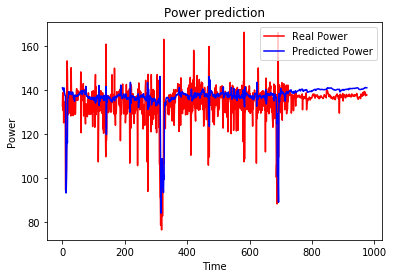

In [33]:
plt.plot(dataset_test, color = 'red', label = 'Real Power')
plt.plot(predicted_power, color = 'blue', label = 'Predicted Power')
plt.title('Power prediction')
plt.xlabel('Time')
plt.ylabel('Power')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(dataset_test, predicted_power))
print(rms)

8.358599780335105


In [51]:
#regressor.save('RNN_power_predict_i_60_n_100.h5')